## **Problem Statement: Automated Classification of Date Fruit Varieties**

### **Background**
Date fruits, grown globally, have various genetic varieties distinguished by their external appearance, including features like color, length, diameter, and shape. Traditionally, identifying these varieties requires expert knowledge, which is both time-consuming and labor-intensive. Automating this process using machine learning can significantly enhance efficiency and accuracy.

### **Objective**
The aim of this study is to develop an automated system for classifying different varieties of date fruits using image analysis and machine learning techniques. Specifically, the varieties to be classified include Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai.

### **Dataset Description**
The dataset consists of 898 images of seven different date fruit varieties, captured using a computer vision system (CVS). From these images, 34 features were extracted, encompassing morphological characteristics, shape, and color.

### **Impact**
Developing an automated classification system for date fruit varieties will streamline the identification process, reduce the need for expert intervention, and ensure consistent and accurate classification. This can significantly benefit agricultural practices, quality control, and market segmentation for date fruits.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

In [7]:
file_path = '/Users/Abigail Sapong/Desktop/Date fruits/Date_Fruit_Datasets.xlsx'

In [8]:
# Load the dataset
data = pd.read_excel(file_path)


In [9]:
data.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [10]:
missing_values = data.isna().sum()
missing_values

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [12]:
# Separate features and target
X = data.drop(['Class'], axis=1)
Y = data['Class']


In [13]:
X.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [14]:
Y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [15]:
#Printing out all the unique varieties
num_of_varieties=list(data['Class'].unique())
num_of_varieties

['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY']

In [16]:
# Encode categorical data for both features and target variable
data['Class'] = data['Class'].map({'BERHI': 0, 'DEGLET': 1,'DOKOL': 2, 'IRAQI': 3,'ROTANA': 4, 'SAFAVI': 5,'SOGAY': 6})
Y = data['Class'] # Assuming 'Class' is your target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# Step 2: Build the initial MLPRegressor model
mlp = MLPRegressor(random_state=42, max_iter=1000)
mlp.fit(X_train, Y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [17]:
# Make predictions
Y_train_pred = mlp.predict(X_train)
Y_test_pred = mlp.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)


print(f"Initial MLP Regressor Train Mean Squared Error: {mse_train}")
print(f"Initial MLP Regressor Test Mean Squared Error: {mse_test}")

Initial MLP Regressor Train Mean Squared Error: 0.14748531703397832
Initial MLP Regressor Test Mean Squared Error: 0.8721664768989448


In [19]:
# Use RandomizedSearchCV to find the best hyperparameters
param_dist = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (100,100,100)],
    'activation': ['tanh', 'relu','softmax'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=42),
                   n_iter=20,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'softmax'],
                                        'alpha': [0.0001, 0.05, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,),
                                                               (100, 100, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [20]:
# Best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Evaluate the optimized model
optimized_mlp = random_search.best_estimator_
y_train_pred_optimized = optimized_mlp.predict(X_train)
y_test_pred_optimized = optimized_mlp.predict(X_test)


mse_train_optimized = mean_squared_error(Y_train, y_train_pred_optimized)
mse_test_optimized = mean_squared_error(Y_test, y_test_pred_optimized)


print(f"Optimized MLP Regressor Train Mean Squared Error: {mse_train_optimized}")
print(f"Optimized MLP Regressor Test Mean Squared Error: {mse_test_optimized}")

Best parameters found: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}
Optimized MLP Regressor Train Mean Squared Error: 0.269401802273643
Optimized MLP Regressor Test Mean Squared Error: 0.5623043040912691


In [21]:
# Using MLP model
INPUTS = 34  # Number of columns in X
CLASSES = 7  # Number of different classes in y
EPOCHS = 900  # Maximum number of epochs MLP will attempt to run until convergence
SEED = 42  # Random seed for reproducibility

# Create the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(INPUTS, CLASSES),
                          alpha=0.05,
                          solver='sgd',
                          activation='relu',
                          learning_rate='adaptive',
                          verbose=False,
                          max_iter=EPOCHS,
                          random_state=SEED
                         )
# No need to reshape X_train for MLPClassifier
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], -1))

# Train the model with training data
mlp_model.fit(X_train, Y_train)  # Training data already scaled with StandardScaler

# Reshape X_test to 2D before prediction
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Make predictions with the test set
predictions_mlp = mlp_model.predict(X_test_reshaped)

In [22]:
# Calculate the accuracy of the model
accuracy_mlp = accuracy_score(Y_test, predictions_mlp)
print("The accuracy is",  accuracy_mlp)

# Calculate the F1-Score
import sklearn
from sklearn.metrics import f1_score
f1_score_mlp = sklearn.metrics.f1_score(Y_test, predictions_mlp, average='weighted')
print("F1-score of the MLP model: {:.2f}".format(f1_score_mlp))

The accuracy is 0.9444444444444444
F1-score of the MLP model: 0.95


In [23]:
# Classification Report
from sklearn.metrics import classification_report
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
print("\nClassification Report:")
print(classification_report(Y_test, predictions_mlp, target_names=classes))



Classification Report:
              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        12
      DEGLET       0.85      0.85      0.85        20
       DOKOL       0.98      0.98      0.98        50
      IRAQUI       0.83      1.00      0.91        10
      ROTANA       1.00      0.94      0.97        35
      SAFAVI       1.00      0.97      0.98        33
       SOGAY       0.82      0.90      0.86        20

    accuracy                           0.94       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.95      0.94      0.95       180



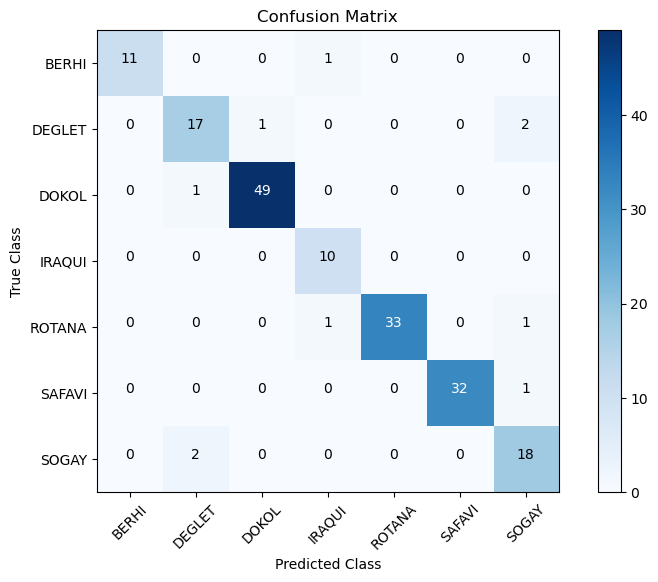

In [24]:
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix.

def plot_confusion_matrix(cm, classes):
    """
    Plots a confusion matrix.

    Args:
        cm (numpy.array): Confusion matrix.
        classes (list): List of class labels.

    Returns:
        None
    """
    cmap = plt.cm.Blues
    plt.figure(figsize=(10, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()

# Parameters
true_values = Y_test
predicted_values = predictions_mlp

# Confusion Matrix
cm = confusion_matrix(true_values, predicted_values)
classes = ['BERHI', 'DEGLET', 'DOKOL', 'IRAQUI', 'ROTANA', 'SAFAVI', 'SOGAY']
plot_confusion_matrix(cm, classes)
